In [11]:
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # gravitational constant, m^3 kg^-1 s^-2
r = 6.371e6 # Earth's radius
As = 1000e3 # altitude of satellite from Earth

dt = 200     # time step in seconds 

simulation_hours = 10 # Simulation duration in hours
secs_in_sim = simulation_hours * 60 * 60  # Number of seconds in simulation duration
num_steps =int( secs_in_sim // dt)   # Steps in simulation duration given dt size

# Masses
M1 = 5.972e24    # Mass of Earth
M2 = 2500    # Weight of satellite 

# Initial conditions
# First body - Earth
x1 = 0
y1 = 0
vx1 = 0 

# Second body - Satellite
initial_distance = r + As  # Earth's radius + altitude of satellite in meters
x2 = initial_distance
y2 = 0
vx2 = 0 

def get_initial_velocity( M1, M2):
	v1 = M2* np.sqrt(G /((M1 + M2) * initial_distance))
	v2 =-M1*v1/M2 
	return v1, v2

def plot_trajectories(positions1, positions2, name): 
    plt.figure(figsize=(10, 5))
    # Plot for Earth with a large, distinctive marker
    plt.scatter(positions1['x'][-1], positions1['y'][-1], color='blue', marker='.')
    plt.plot(positions1['x'], positions1['y'], label='mass M1', color='blue')
    # Plot for Satellite
	
    plt.scatter(positions2['x'][-1], positions2['y'][-1], color='orange', marker='.')
    plt.plot(positions2['x'], positions2['y'], label='mass M2', color='orange')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    title = "Two-Body Simulation using " + name + " method"
    plt.title(title)
    plt.axis('equal')
    plt.legend()
    plt.show()

def plot_position_against_time(positions, body_name, color1, color2):
    plt.figure(figsize=(10, 5))
    plt.plot(positions['x'], label='X Position', color=color1)
    plt.plot(positions['y'], label='Y Position', color=color2, linestyle='--')
    plt.title(f'Position vs. Time for {body_name}')
    plt.xlabel('Time (in dt steps)')
    plt.ylabel('Position')
    plt.legend()
    plt.show()

def sim_euler(x1, y1, x2, y2, vx1, vy1, vx2, vy2, M1, M2, dt):
    # Lists to store positions
    positions1 = {'x': [x1], 'y': [y1]}
    positions2 = {'x': [x2], 'y': [y2]}
    
    for _ in range(num_steps):
        # Calculate distance between bodies
        dx = x2 - x1
        dy = y2 - y1
        r = np.sqrt(dx**2 + dy**2)
        
        # Gravitational force (magnitude)
        F = G * M1 * M2 / r**2
        
        # Accelerations
        ax1 = F * dx / (r * M1)
        ay1 = F * dy / (r * M1)
        
        ax2 = -F * dx / (r * M2)
        ay2 = -F * dy / (r * M2)
        
        # Update velocities
        vx1 += ax1 * dt
        vy1 += ay1 * dt
        
        vx2 += ax2 * dt
        vy2 += ay2 * dt
        
        # Update positions
        x1 += vx1 * dt
        y1 += vy1 * dt
        
        x2 += vx2 * dt
        y2 += vy2 * dt
        
        # Store positions
        positions1['x'].append(x1)
        positions1['y'].append(y1)
        
        positions2['x'].append(x2)
        positions2['y'].append(y2)
    return positions1, positions2

def sim_leapfrog(x1, y1, x2, y2, vx1, vy1, vx2, vy2, M1, M2, dt):
    # Lists to store positions
    positions1 = {'x': [x1], 'y': [y1]}
    positions2 = {'x': [x2], 'y': [y2]}

    # Initial half-step velocity update
    dx = x2 - x1
    dy = y2 - y1
    r = np.sqrt(dx**2 + dy**2)

    # Gravitational force (magnitude)
    F = G * M1 * M2 / r**2

    # Accelerations
    ax1 = F * dx / (r * M1)
    ay1 = F * dy / (r * M1)

    ax2 = -F * dx / (r * M2)
    ay2 = -F * dy / (r * M2)

    vx1 += ax1 * dt / 2
    vy1 += ay1 * dt / 2

    vx2 += ax2 * dt / 2
    vy2 += ay2 * dt / 2

    for _ in range(num_steps):
        # Update positions by full step
        x1 += vx1 * dt
        y1 += vy1 * dt
        
        x2 += vx2 * dt
        y2 += vy2 * dt
        
        # Update distances for velocity update
        dx = x2 - x1
        dy = y2 - y1
        r = np.sqrt(dx**2 + dy**2)
        F = G * M1 * M2 / r**2

        # Accelerations based on new positions
        ax1 = F * dx / (r * M1)
        ay1 = F * dy / (r * M1)
        ax2 = -F * dx / (r * M2)
        ay2 = -F * dy / (r * M2)
    
        # Full-step velocity update for next iteration's position calculation
        vx1 += ax1 * dt
        vy1 += ay1 * dt
        
        vx2 += ax2 * dt
        vy2 += ay2 * dt
    
        # Store positions
        positions1['x'].append(x1)
        positions1['y'].append(y1)
        
        positions2['x'].append(x2)
        positions2['y'].append(y2)
    return positions1, positions2





### Compare Euler and leapfrog methods

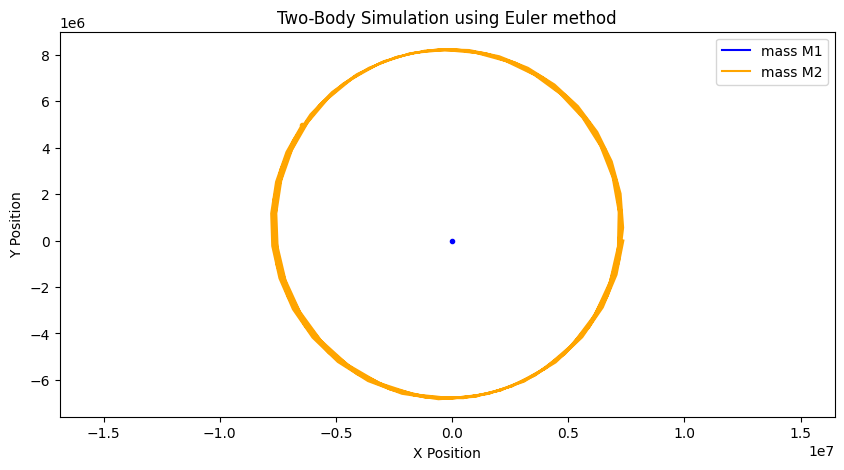

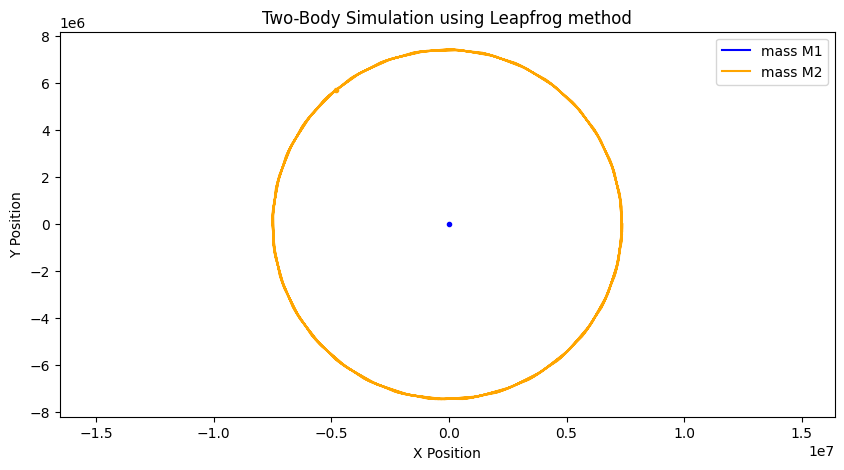

In [12]:
vy1, vy2 = get_initial_velocity( M1, M2)
positions1, positions2 = sim_euler(x1, y1, x2, y2, vx1, vy1, vx2, vy2, M1, M2, dt)
plot_trajectories(positions1, positions2, "Euler")
positions1, positions2 = sim_leapfrog(x1, y1, x2, y2, vx1, vy1, vx2, vy2, M1, M2, dt)
plot_trajectories(positions1, positions2, "Leapfrog")

### Position of M1 against time

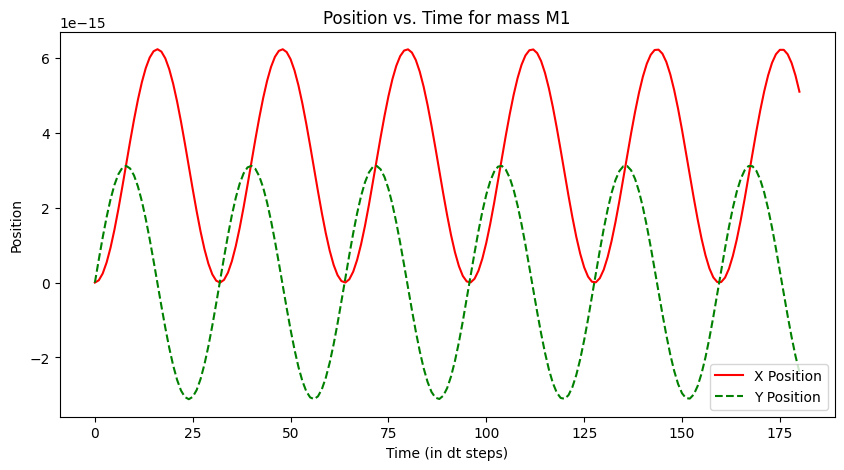

In [13]:
plot_position_against_time(positions1, 'mass M1', 'red', 'green')

### Position of M2 against time

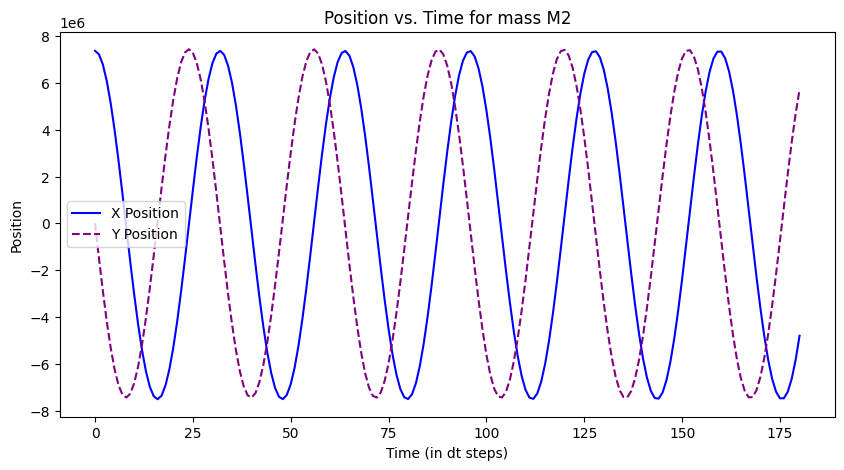

In [14]:
plot_position_against_time(positions2, 'mass M2', 'blue', 'purple')

### Simulate bodies of comparable size

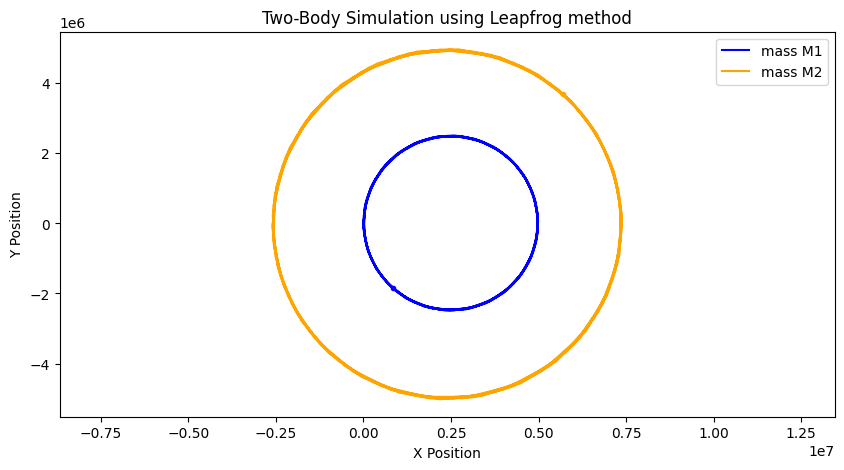

In [15]:
M1 = 5.972e24    
M2 = M1/2
dt=200
vy1, vy2=get_initial_velocity(M1, M2)
positions1, positions2 = sim_leapfrog(x1, y1, x2, y2, vx1, vy1, vx2, vy2, M1, M2, dt)
plot_trajectories(positions1, positions2, "Leapfrog")

### Simulating with a larger timestep

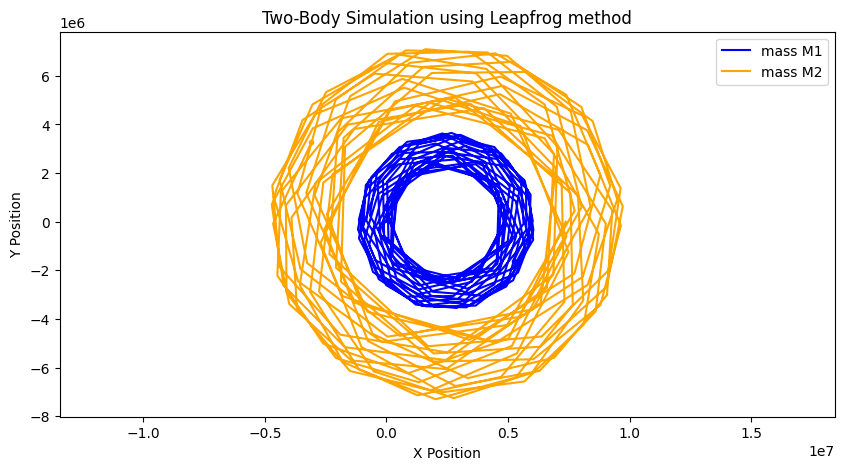

In [16]:
dt=800
positions1, positions2 = sim_leapfrog(x1, y1, x2, y2, vx1, vy1, vx2, vy2, M1, M2, dt)
plot_trajectories(positions1, positions2, "Leapfrog")

### Simulate elliptical orbits

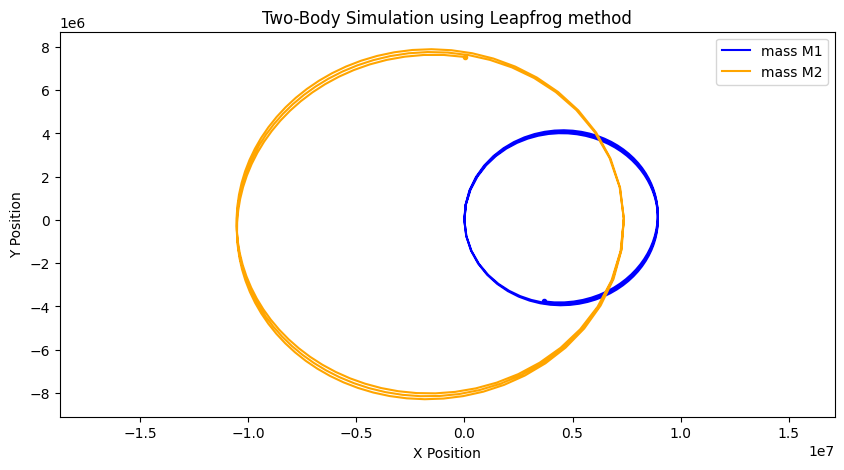

In [17]:
def get_initial_velocity2( M1, M2):
    v1 = M2* np.sqrt(G /((M1 + M2) * initial_distance))
    v1*=1.2
    v2 =-M1*v1/M2 
    return v1, v2

M1 = 5.972e24    
M2 = M1/2
dt=200
vy1, vy2=get_initial_velocity2(M1, M2)
positions1, positions2 = sim_leapfrog(x1, y1, x2, y2, vx1, vy1, vx2, vy2, M1, M2, dt)
plot_trajectories(positions1, positions2, "Leapfrog")

### Simulate bodies colliding

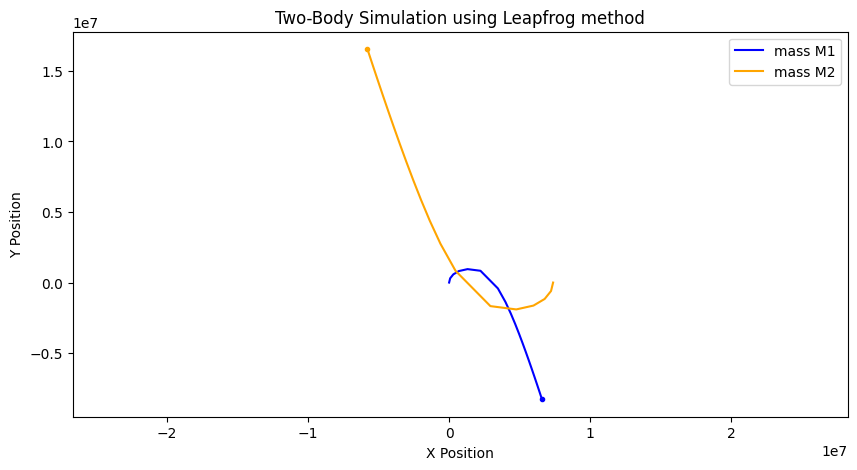

In [18]:
def get_initial_velocity2( M1, M2):
    v1 = M2* np.sqrt(G /((M1 + M2) * initial_distance))
    v1*=0.5
    v2 =-M1*v1/M2 
    return v1, v2

simulation_hours = 1 # Simulation duration in hours
secs_in_sim = simulation_hours * 60 * 60  # Number of seconds in simulation duration
num_steps =int( secs_in_sim // dt)   # Steps in simulation duration given dt size
M1 = 5.972e24    
M2 = M1/2
dt=200
vy1, vy2=get_initial_velocity2(M1, M2)
positions1, positions2 = sim_leapfrog(x1, y1, x2, y2, vx1, vy1, vx2, vy2, M1, M2, dt)
plot_trajectories(positions1, positions2, "Leapfrog")

### two bodies drifting apart



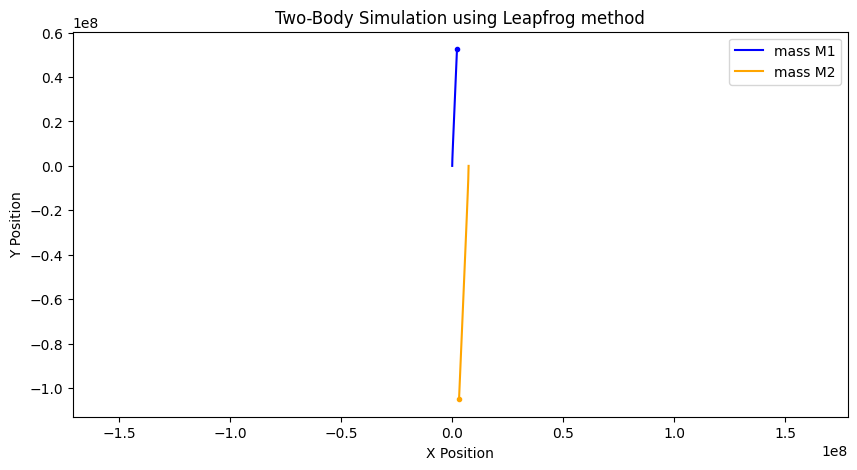

In [19]:
def get_initial_velocity2( M1, M2):
    v1 = M2* np.sqrt(G /((M1 + M2) * initial_distance))
    v1*=5
    v2 =-M1*v1/M2 
    return v1, v2

simulation_hours = 1 # Simulation duration in hours
secs_in_sim = simulation_hours * 60 * 60  # Number of seconds in simulation duration
num_steps =int( secs_in_sim // dt)   # Steps in simulation duration given dt size
M1 = 5.972e24    
M2 = M1/2
dt=200
vy1, vy2=get_initial_velocity2(M1, M2)
positions1, positions2 = sim_leapfrog(x1, y1, x2, y2, vx1, vy1, vx2, vy2, M1, M2, dt)
plot_trajectories(positions1, positions2, "Leapfrog")